<font color="red" size="6">Filter Methods</font>
<p><font color="Yellow" size="4">3_Mutual Information</font>

<b><font color="pink">Feature Selection Using Mutual Information:</font>

Mutual Information (MI) measures the dependency between variables. It captures both linear and non-linear relationships, unlike correlation. High mutual information indicates that knowing one variable reduces uncertainty about the other.

<b>Steps:</b>
<ol>
<li>Compute the mutual information between features and the target variable.</li>
    <li>Rank features based on their MI scores.</li>
    <li>Select features with high MI scores.</li></ol>

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
import matplotlib.pyplot as plt

In [3]:
# Create a sample dataset
data = {
    "Feature1": [1, 2, 3, 4, 5],
    "Feature2": [2, 4, 6, 8, 10],  # Perfectly correlated with Feature1
    "Feature3": [5, 4, 3, 2, 1],  # Negatively correlated with Feature1
    "Feature4": [1, 1, 1, 1, 1],  # Zero variance
    "Target": [0, 1, 0, 1, 0]     # Binary target variable
}
df = pd.DataFrame(data)
X = df.drop(columns=["Target"])
y = df["Target"]

In [4]:
print("Original Dataset:")
print(df)

Original Dataset:
   Feature1  Feature2  Feature3  Feature4  Target
0         1         2         5         1       0
1         2         4         4         1       1
2         3         6         3         1       0
3         4         8         2         1       1
4         5        10         1         1       0


In [5]:
# Compute mutual information for classification
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores_df = pd.DataFrame({"Feature": X.columns, "MI Score": mi_scores}).sort_values(by="MI Score", ascending=False)

In [6]:
print("\nMutual Information Scores:")
print(mi_scores_df)


Mutual Information Scores:
    Feature  MI Score
3  Feature4  1.383333
0  Feature1  0.000000
1  Feature2  0.000000
2  Feature3  0.000000


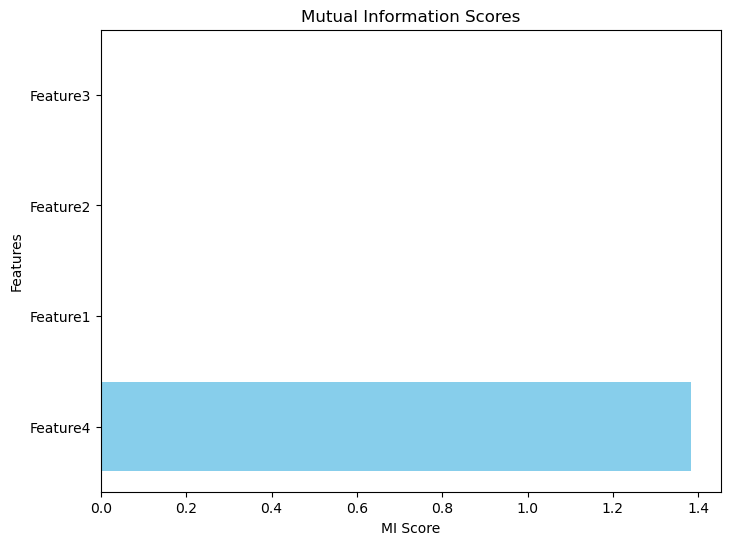

In [7]:
# Plot mutual information scores
plt.figure(figsize=(8, 6))
plt.barh(mi_scores_df["Feature"], mi_scores_df["MI Score"], color="skyblue")
plt.title("Mutual Information Scores")
plt.xlabel("MI Score")
plt.ylabel("Features")
plt.show()

Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  

Mutual Information Scores:
             Feature  MI Score
2  petal length (cm)  0.992573
3   petal width (cm)  0.985643
0  sepal length (cm)  0.511365
1   sepal width (cm)  0.299424


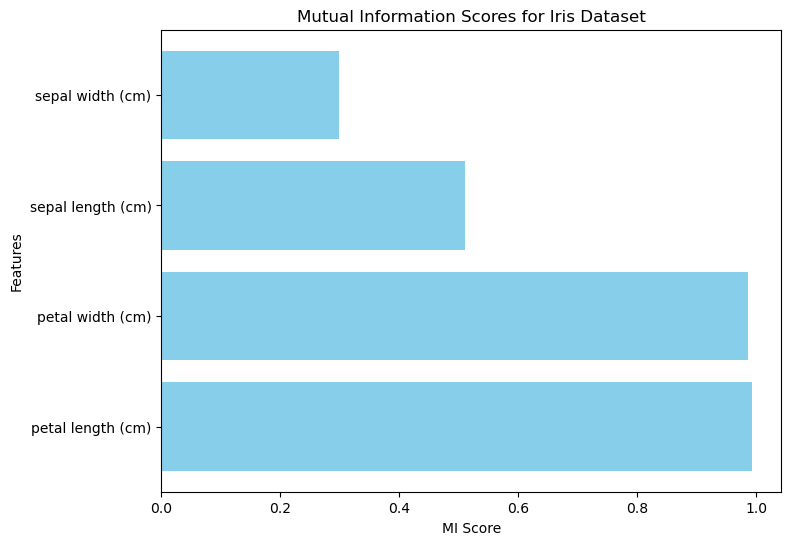

In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target (species)

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['Target'] = y

# Display the first few rows of the dataset
print("Iris Dataset:")
print(df.head())

# Compute Mutual Information scores for classification
mi_scores = mutual_info_classif(X, y, random_state=42)

# Display Mutual Information scores for each feature
mi_scores_df = pd.DataFrame({"Feature": iris.feature_names, "MI Score": mi_scores}).sort_values(by="MI Score", ascending=False)

print("\nMutual Information Scores:")
print(mi_scores_df)

# Visualize the MI scores
plt.figure(figsize=(8, 6))
plt.barh(mi_scores_df["Feature"], mi_scores_df["MI Score"], color="skyblue")
plt.title("Mutual Information Scores for Iris Dataset")
plt.xlabel("MI Score")
plt.ylabel("Features")
plt.show()


<b>In this hypothetical example, petal width and petal length have the highest MI scores, making them the most informative features for predicting the target variable (iris species). The sepal width has the lowest MI score, suggesting it is less informative in distinguishing between the different species.